У нас есть архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Наша задача выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

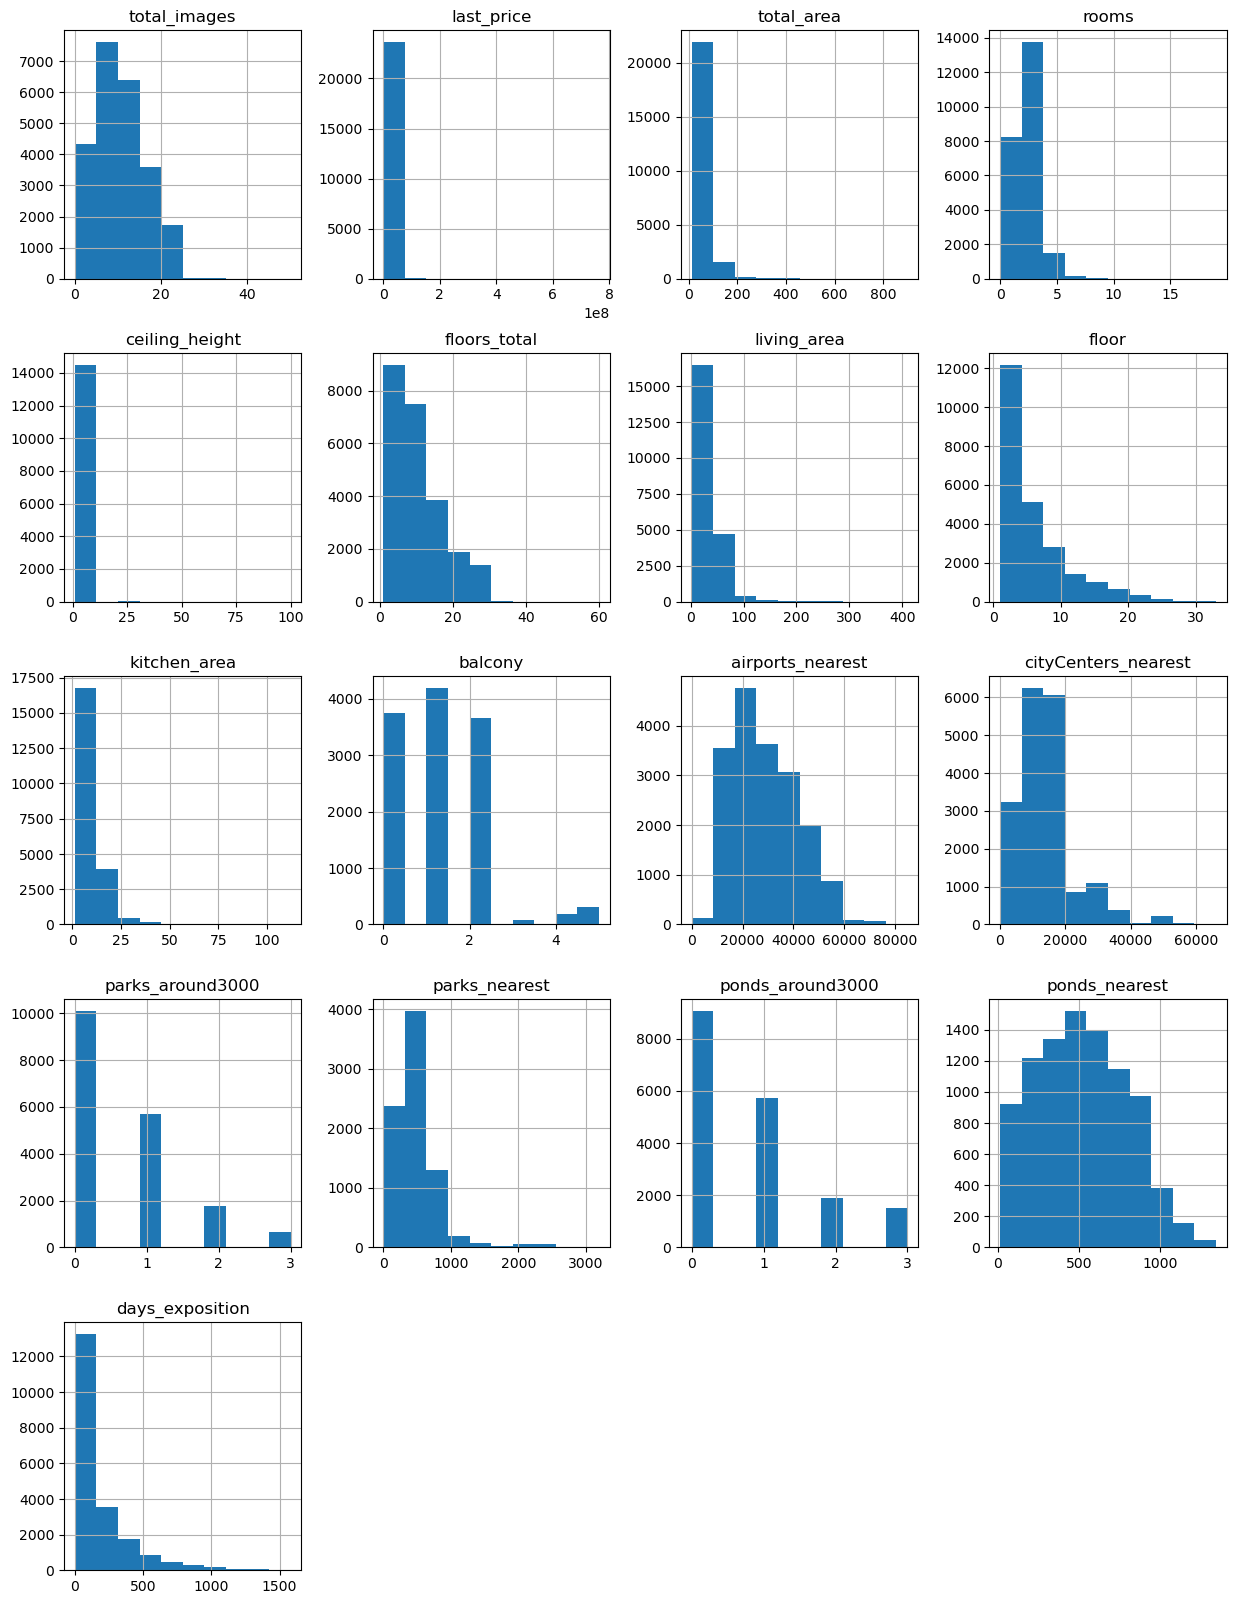

In [121]:
data = pd.read_csv(r'C:\Users\shayb\Downloads\real_estate_data.csv', sep = '\t')
display(data.head(5))
data.info()
data.hist(figsize=(15,20));


В данных 22 столбца и 23699 строк. В 14 столбцах присутствуют пропуски. В некоторых столбцах неверно указан тип данных. По общей графической информации нельзя сделать никаких однозначных выводов, нужен детальный анализ данных.

## Предобработка данных

### Работа с пропусками
Найдем и изучим пропущенные значения в столбцах.

Изучив общую информацию о датасете, мы видим, что в данных 23699 строк, следовательно, пропуски присутствуют в тех столбцах, где их меньше, а именно: 
- ceiling_height, 
- floors_total, 
- living_area, 
- is_apartment, 
- kitchen_area, 
- balcony, 
- locality_name, 
- airports_nearest, 
- cityCenters_nearest, 
- parks_around3000, 
- parks_nearest, 
- ponds_around3000, 
- ponds_nearest, 
- days_exposition.

Переименуем столбцы, которые названы с нарушением стиля.

In [122]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'},
            inplace=True)

Начинаем избавляться от пропусков.
Посчитаем сколько их в каждом столбце.

In [123]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Теперь визуализируем пропуски.

<AxesSubplot:>

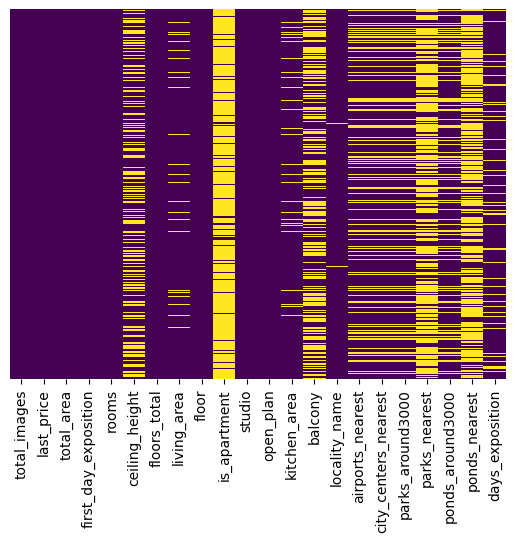

In [124]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Столбцы, в которых отсутствует больше половины данных нам не нужны, так как это слишком много для качественного анализа данных. Удаляем столбцы:
- is_apartment,
- parks_nearest,
- ponds_nearest.

In [125]:
data = data.drop(columns=['is_apartment', 'parks_nearest', 'ponds_nearest'])

Теперь заменим все пропуски в столбце balcony на ноль, так как скорее всего отсутствие значения предполагает отсутствие балконов в квартире.

In [126]:
data['balcony'] = data['balcony'].fillna(0)

У нас есть 2 столбца (floors_total, locality_name), в которых пропуски составляют меньше 1%, это позволяет нам просто избавиться от строк, в которых присутсвуют пропуски.

In [127]:
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(
    drop=True)

У нас осталось 5 столбцов с пропусками. Значения в них числовые, следовательно можно заполнить пропуски по средней или медианной величинам.
- ceiling_height (высота потолков) - для безопасности заполним пропуски медианным значением.
- living_area (жилая площадь) - для безопасности заполним пропуски медианным значением.
- kitchen_area (площадь кухни) - для безопасности заполним пропуски медианным значением.
- parks_around3000 (количество праков в районе 3 км) - заменим пропуски нулями.
- ponds_around3000 (количество водоемов в районе 3 км) - заменим пропуски нулями.

In [128]:
data['ceiling_height'] = data['ceiling_height'].fillna(
    data['ceiling_height'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(
    data['kitchen_area'].median())
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Еще раз визуализируем наличие пропусков.

<AxesSubplot:>

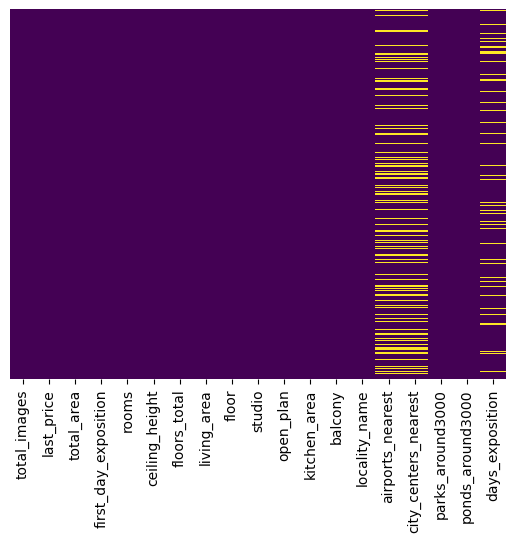

In [129]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Оставшиеся пропуски трогать не будем.
Две основные причины пропусков в данных это человеческий фактор (не правильное заполнение полей, не желание отвечать и др.), технические ошибки или повреждение файла вовремя выгрузки.
После того как мы разобрались со всеми пропусками, мы можем двигаться дальше.

### Изменение типа данных
Присутсвуют столбцы, в которых не верно указан тип данных. Такими столбцами являются: 
- first_day_exposition (тип данных должен быть datetime64),
- floors_total (тип данных должен быть int64),
- balcony (тип данных должен быть int64),
- parks_around3000 (тип данных должен быть int64),
- ponds_around3000 (тип данных должен быть int64),
- days_exposition (тип данных должен быть int64).

Поменяем типы данных на верные.

In [130]:
data['first_day_exposition'] = data['first_day_exposition'].astype(
    'datetime64')
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['days_exposition'] = pd.to_numeric(data['days_exposition'],
                                        errors='coerce')

Очень важно, чтобы тип данных соответствовал действительности. От этого зависит корректность работы кода. Если мы не хотим сталкиваться с ошибками в самый неожиданный момент, нужно проверить тип данных в начале исследования. 

Проверим данные на неявные дубликаты в столбце locality_name. При их наличии избавимся от них.

In [131]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Проведем следующую работу: 
- все "ё" заменим на "е",
- оставим в названиях населенных пунктов только "деревня" и "поселок",
- приведем все к нижнему регистру,
- приведем к одному названию повторяющиеся населенные пункты.

In [132]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace(
    'поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace(
    'городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace(
    'поселок мурино', 'мурино')
data['locality_name'] = data['locality_name'].str.replace(
    'деревня кудрово', 'кудрово')
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'д

## Поиск и устранение редких и выбивающихся значений (аномалий)

Изучим числовые показатели всех столбцов.

In [133]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,23565.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.102255,5.878124,10.423234,0.593677,28797.082701,14192.656056,0.468831,0.589900,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,21.189133,4.871485,5.631746,0.960660,12632.499735,8613.348153,0.748403,0.883966,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18565.000000,9238.000000,0.000000,0.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,0.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.410000,1.000000,37273.000000,16285.000000,1.000000,1.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3.000000,1580.000000


Изучим подробнее и поправим следующие столбцы:
- last_price
- ceiling_height
- living_area
- kitchen_area
- airports_nearest

### last_price

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)
12897    763000000.0
19431    420000000.0
14621    401300000.0
1431     330000000.0
15565    300000000.0
22701    289238400.0
16372    245000000.0
13671    240000000.0
5863     230000000.0
8857     190870000.0
Name: last_price, dtype: float64
18763    470000.0
21787    470000.0
5670     450000.0
17577    450000.0
9535     450000.0
16130    450000.0
16185    440000.0
17359    430000.0
14825    430000.0
8750      12190.0
Name: last_price, dtype: float64
Всего квартир стоимостью меньше или равно нулю: 0
Всего квартир стоимостью меньше 100.000: 1
Всего квартир стоимостью больше 100.000.000: 37


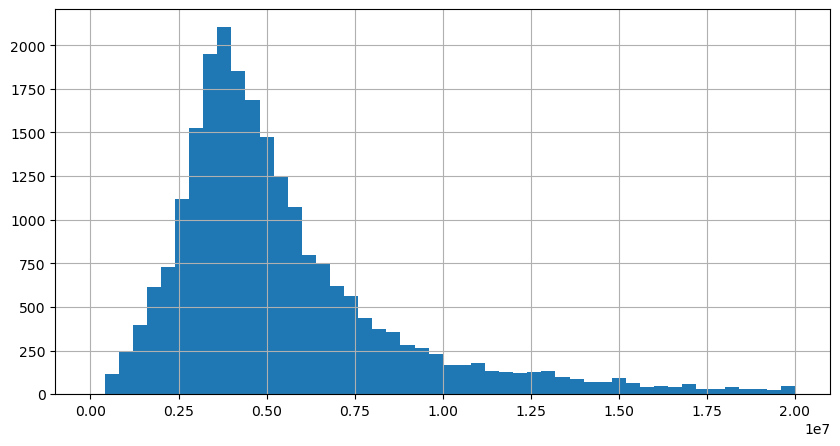

In [134]:
print(data['last_price'].describe())
print(data['last_price'].hist(bins=50, range=(0, 2e+07), figsize=(10, 5)))
print(data['last_price'].sort_values(ascending=False).head(10))
print(data['last_price'].sort_values(ascending=False).tail(10))
print('Всего квартир стоимостью меньше или равно нулю:',
      data.query('last_price <= 0')['last_price'].count())
print('Всего квартир стоимостью меньше 100.000:',
      data.query('last_price < 1e+05')['last_price'].count())
print('Всего квартир стоимостью больше 100.000.000:',
      data.query('last_price > 1e+08')['last_price'].count())

Минимальная стоимость квартиры - 12190. Выглядит очень подозрительно, удалим эту строку. Квартир больше 100.000.000 29 штук. Это нельзя считать выбросом, так как значений много. На графике видно, что стоимость повышается постепенно. Скорее всего это элитное и очень дорогостоящее жилье, оставим его.

In [135]:
data = data.query('last_price > 1e+05')

### ceiling_height

count    23564.000000
mean         2.724529
std          0.991047
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


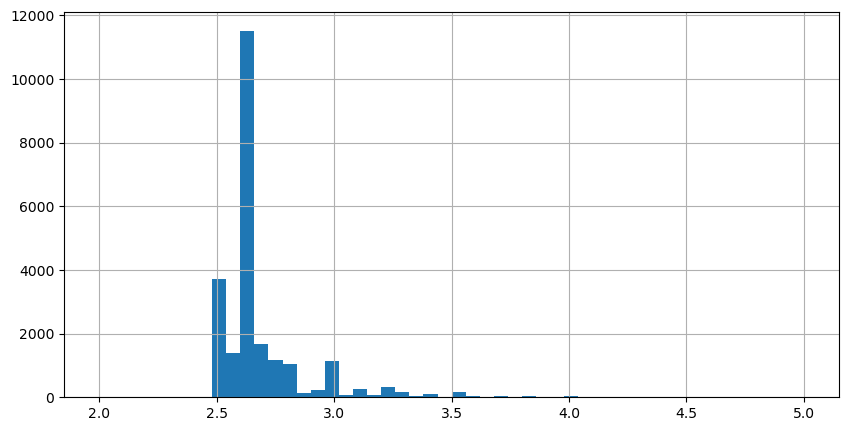

In [136]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=50, range=(2,5), figsize=(10,5))
plt.show()

Обычно высота потолков квартирах варьируется от 2,5 м до 3,2 м. В элитной недвижимости может достигать 4 м. 
Посчитаем, что в записях, где потоки от 14 до 32 метрах ошиблись и разделим их на десять
Для анализа оставим только те квартиры, в которых высота потолков составляет от 2,5 м до 4 м.

In [ ]:
data.loc[data['ceiling_height'] >= 14,
         'ceiling_height'] = data['ceiling_height'] / 10
data = data.query('ceiling_height >= 2.5 and ceiling_height <= 4')
data.boxplot(column=['ceiling_height'], figsize=(10, 5), grid=True)
plt.show()
print(data['ceiling_height'].hist(bins=50, range=(2.5, 4)))
print(data['ceiling_height'].describe())

### living_area

In [138]:
data['living_area'].describe()

count    23435.00000
mean        34.01666
std         20.84088
min          2.00000
25%         19.00000
50%         30.00000
75%         41.00000
max        409.70000
Name: living_area, dtype: float64

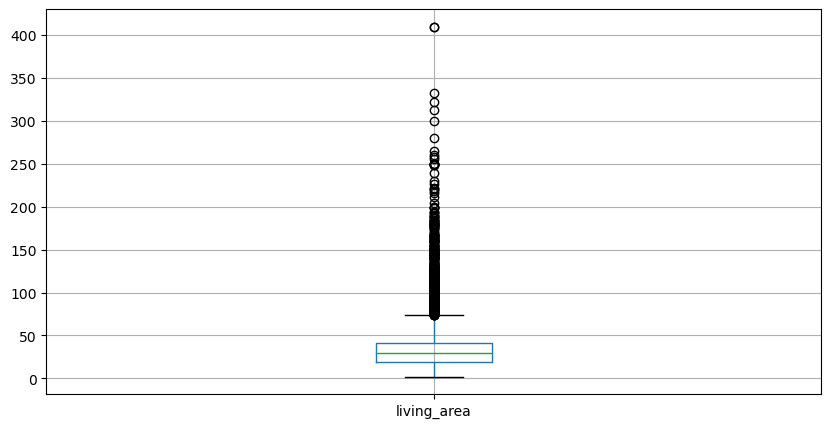

AxesSubplot(0.125,0.11;0.775x0.77)


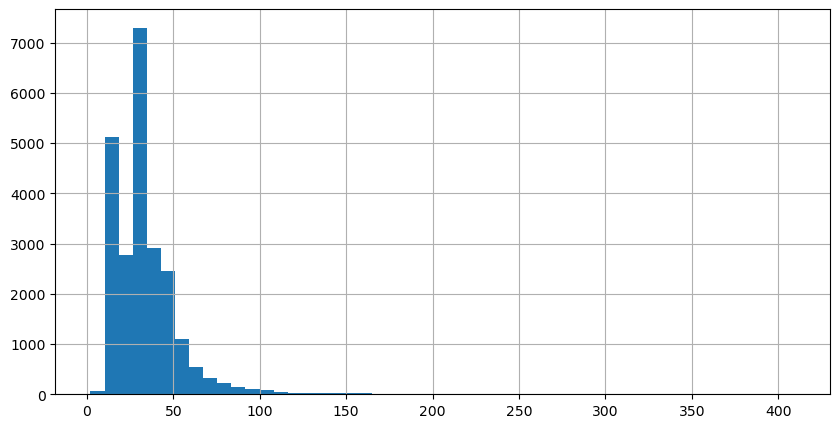

In [139]:
data.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.show()
print(data['living_area'].hist(bins=50, figsize=(10,5)))

Минимальный показатель жилой площади - 2 квадратных метра. Мы понимаем, что такого быть не может. Оставим только те квартиры, жилая площадь которых больше или равна 14 квадратным метрам (минимальный показатель по законодательству). При этом уберем квартиры, жилая площадь которых больше 200 м.

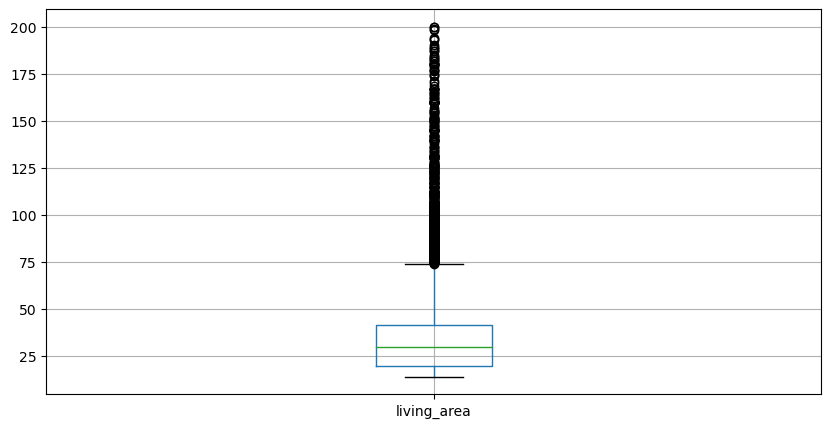

AxesSubplot(0.125,0.11;0.775x0.77)


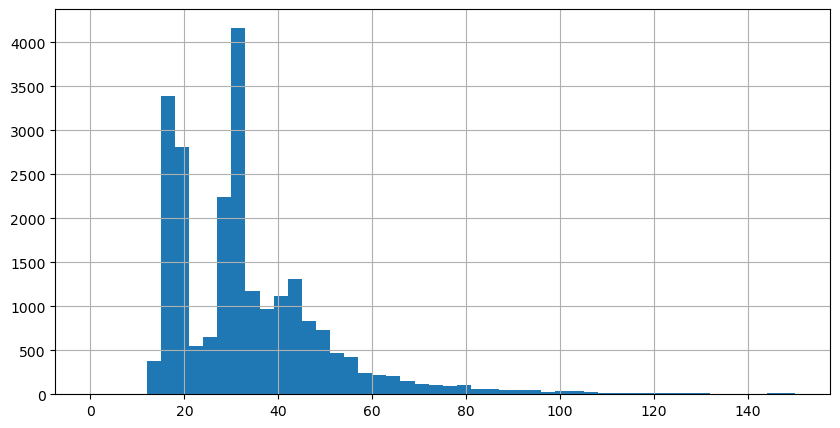

In [140]:
data = data.query('living_area >= 14 and living_area <= 200')
data.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.show()
print(data['living_area'].hist(bins=50, range=(0,150), figsize=(10,5)))

### kitchen_area

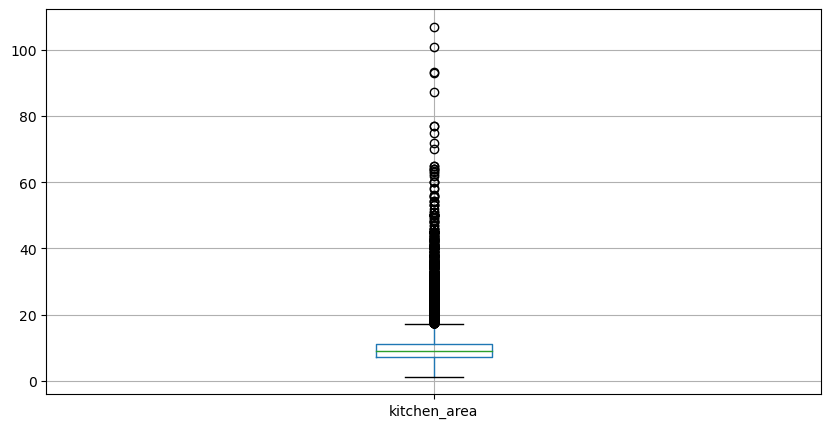

AxesSubplot(0.125,0.11;0.775x0.77)


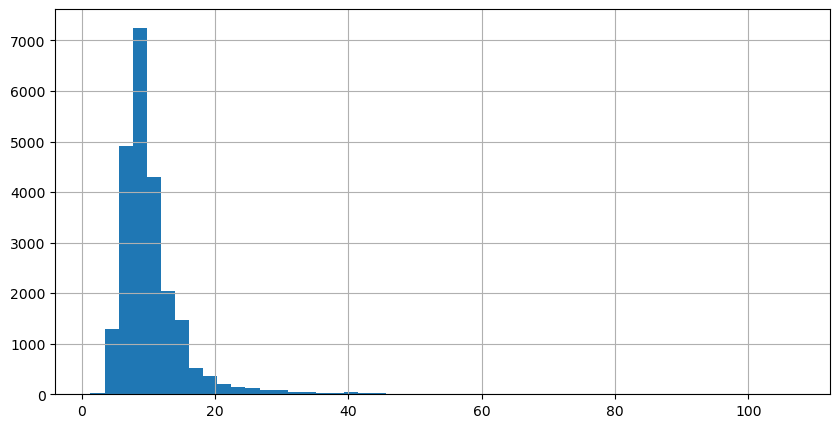

In [141]:
data.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.show()
print(data['kitchen_area'].hist(bins=50, figsize=(10,5)))

Оставим квартиры, в которых площадь кухни больше 5 квадратных метров (меньше запрещает законодательство) и меньше 65 квадратных метров.

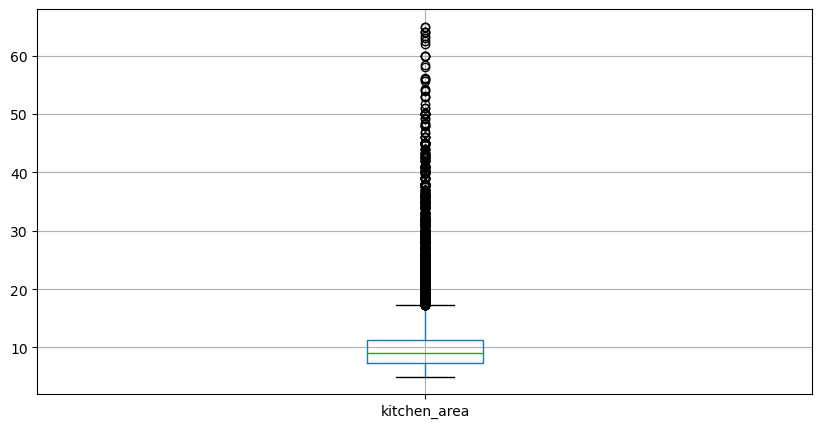

AxesSubplot(0.125,0.11;0.775x0.77)
count    22986.000000
mean        10.342047
std          5.192821
min          5.000000
25%          7.400000
50%          9.100000
75%         11.360000
max         65.000000
Name: kitchen_area, dtype: float64


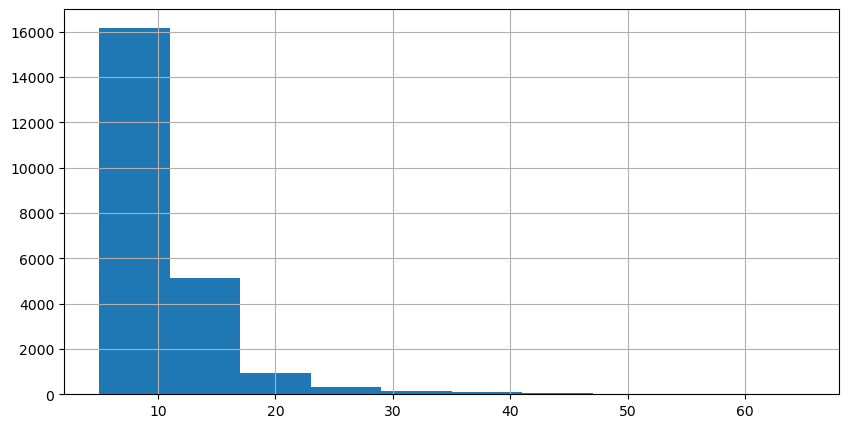

In [142]:
data = data.query('kitchen_area >= 5 and kitchen_area <= 65')
data.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.show()
print(data['kitchen_area'].hist(bins=10, figsize=(10,5)))
print(data['kitchen_area'].describe())

### airports_nearest

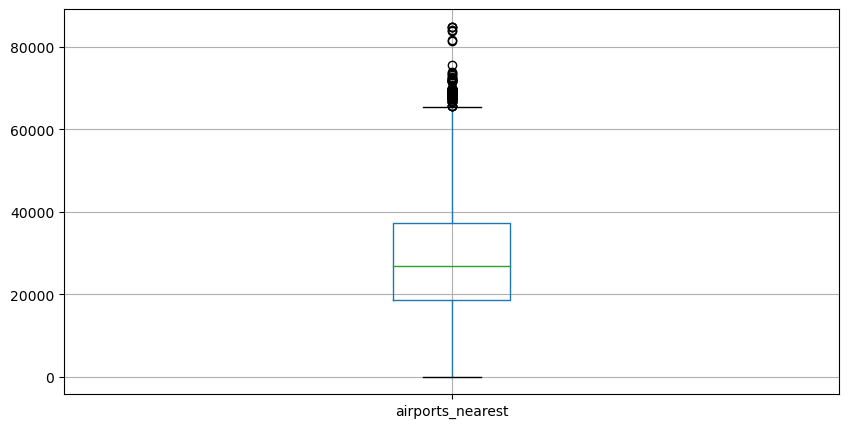

AxesSubplot(0.125,0.11;0.775x0.77)
count    17624.000000
mean     28786.407172
std      12602.880499
min          0.000000
25%      18545.000000
50%      26770.000000
75%      37278.750000
max      84869.000000
Name: airports_nearest, dtype: float64


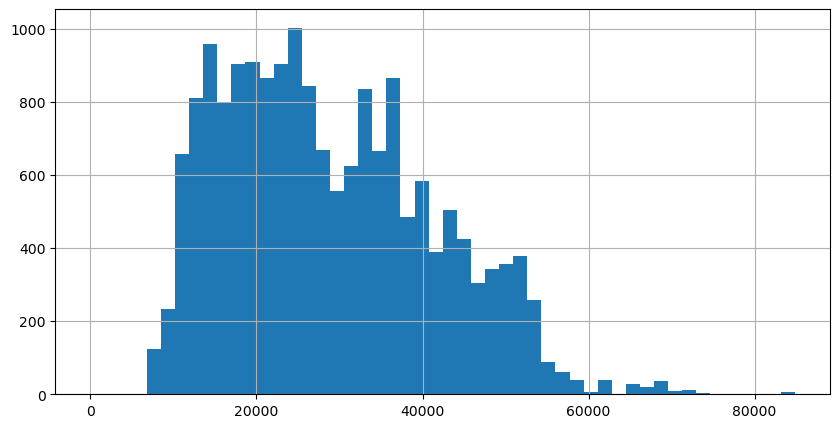

In [143]:
data.boxplot(column=['airports_nearest'], figsize=(10,5), grid=True)
plt.show()
print(data['airports_nearest'].hist(bins=50, figsize=(10,5)))
print(data['airports_nearest'].describe())

Место расположение квартиры не может быть в аэропорту, явно это выброс, удалим эту строку.

In [144]:
data = data.query('airports_nearest > 0')
data['airports_nearest'].describe()

count    17623.000000
mean     28788.040629
std      12601.372286
min       6450.000000
25%      18548.000000
50%      26770.000000
75%      37280.500000
max      84869.000000
Name: airports_nearest, dtype: float64

В данных присутствует очень большой разброс по показателям, а так же аномалии. Например, высота потолков 25 метров, расположение квартиры в аэропорту, слишком маленькая жилая площадь или площадь кухни. Мы очистили данные от выбросов, теперь можно двигаться дальше.

### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [145]:
data['one_price'] = data['last_price']/data['total_area']
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

In [146]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'  
data['floor_category'] = data.apply(floor_category, axis = 1)

In [147]:
data['city_centers_km'] = data['city_centers_nearest']/1000
data['city_centers_km'] = data['city_centers_km'].round()

## Проведем исследовательский анализ данных

Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- день и месяц публикации объявления.

In [148]:
display(data)
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,one_price,publication_weekday,publication_month,publication_year,floor_category,city_centers_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,2,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,0,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,2,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.0,9,False,...,6800.0,2,3,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,1,121.0,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23556,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,6263.0,1,0,15.0,105769.230769,3,7,2018,другой,6.0
23557,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,4489.0,0,1,519.0,129903.978052,3,10,2016,другой,4.0
23559,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,34104.0,1,1,239.0,73717.948718,4,8,2016,другой,34.0
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,4232.0,1,3,NaN,72490.845228,1,3,2017,другой,4.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,one_price,publication_weekday,publication_month,publication_year,city_centers_km
count,17623.000000,1.762300e+04,17623.000000,17623.000000,17623.000000,17623.000000,17623.000000,17623.000000,17623.000000,17623.00000,17623.000000,17622.000000,17623.000000,17623.000000,15358.000000,1.762300e+04,17623.000000,17623.000000,17623.000000,17622.000000
mean,10.067752,7.340340e+06,62.959863,2.143619,2.709244,11.178006,35.551934,6.121148,10.686705,0.58645,28788.040629,14199.012995,0.608636,0.765250,182.261753,1.098627e+05,2.562050,6.406684,2017.345401,14.192657
std,5.748469,8.812761e+06,35.028585,1.092725,0.219885,6.507971,20.664536,4.921541,5.584940,0.96688,12601.372286,8578.440912,0.799847,0.936826,223.501854,4.620468e+04,1.782236,3.475862,1.050386,8.587320
min,0.000000,1.200000e+06,13.000000,0.000000,2.500000,1.000000,14.000000,1.000000,5.000000,0.00000,6450.000000,181.000000,0.000000,0.000000,1.000000,1.534527e+04,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,4.000000e+06,41.700000,1.000000,2.600000,5.000000,20.000000,3.000000,7.400000,0.00000,18548.000000,9289.000000,0.000000,0.000000,43.000000,8.735286e+04,1.000000,3.000000,2017.000000,9.000000
50%,10.000000,5.299000e+06,54.500000,2.000000,2.650000,9.000000,30.000000,5.000000,9.100000,0.00000,26770.000000,13104.500000,0.000000,0.000000,95.500000,1.015152e+05,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,7.690000e+06,73.000000,3.000000,2.715000,16.000000,43.000000,8.000000,12.000000,1.00000,37280.500000,16274.000000,1.000000,1.000000,232.000000,1.205128e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,631.000000,16.000000,4.000000,60.000000,200.000000,33.000000,65.000000,5.00000,84869.000000,65968.000000,3.000000,3.000000,1572.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


### total_area (общая площадь)

count    17623.000000
mean        62.959863
std         35.028585
min         13.000000
25%         41.700000
50%         54.500000
75%         73.000000
max        631.000000
Name: total_area, dtype: float64


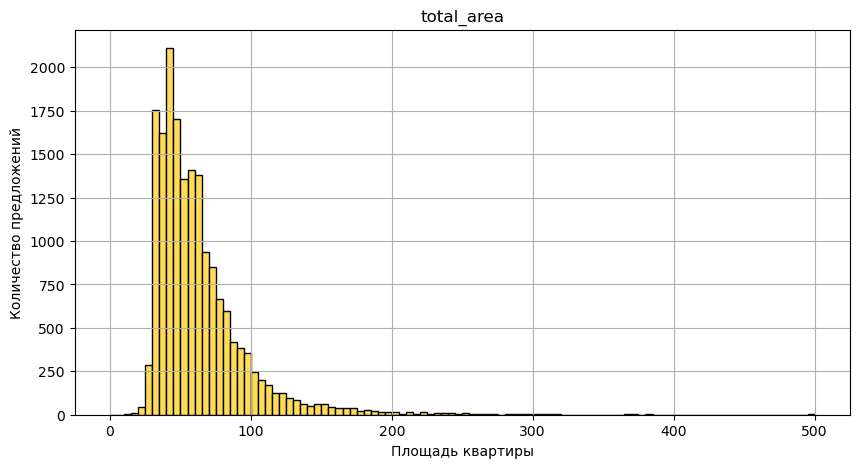

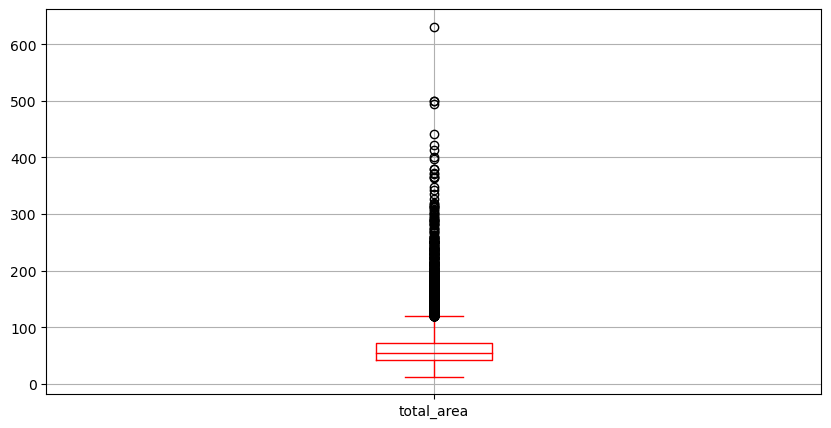

In [149]:
print(data['total_area'].describe())
data.hist(column='total_area',
          bins=int(500 / 5),
          range=(0, 500),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['total_area'], figsize=(10, 5), grid=True, color='red')
plt.show()

Больше всего квартир площадью от 30 до 60 квадратных метров, что логично. Это стандартный метраж для 1-3 комнатных квартир.

### living_area (жилая площадь)

count    17623.000000
mean        35.551934
std         20.664536
min         14.000000
25%         20.000000
50%         30.000000
75%         43.000000
max        200.000000
Name: living_area, dtype: float64


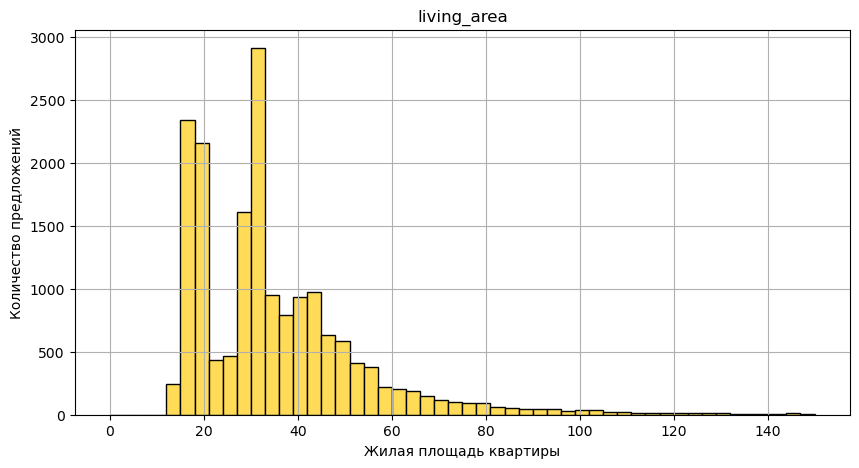

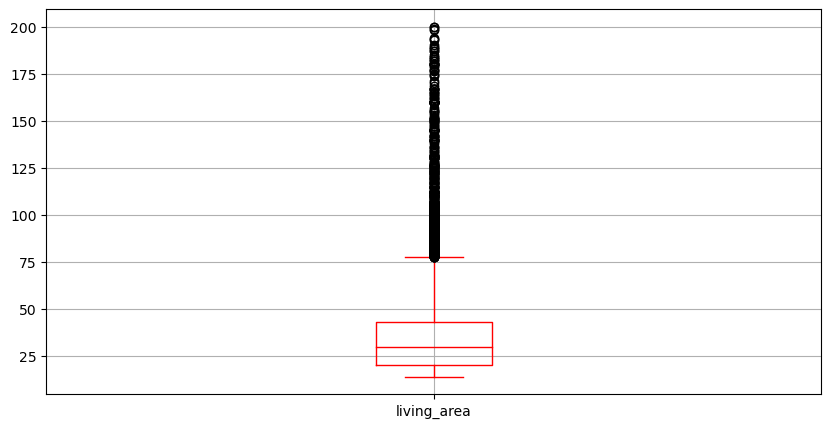

In [150]:
print(data['living_area'].describe())
data.hist(column='living_area',
          bins=int(250 / 5),
          range=(0, 150),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['living_area'], figsize=(10, 5), grid=True, color='red')
plt.show()

Больше всего квартир с жилой площадью примерно 30 квадратных метров.

### kitchen_area (площадь кухни)

count    17623.000000
mean        10.686705
std          5.584940
min          5.000000
25%          7.400000
50%          9.100000
75%         12.000000
max         65.000000
Name: kitchen_area, dtype: float64


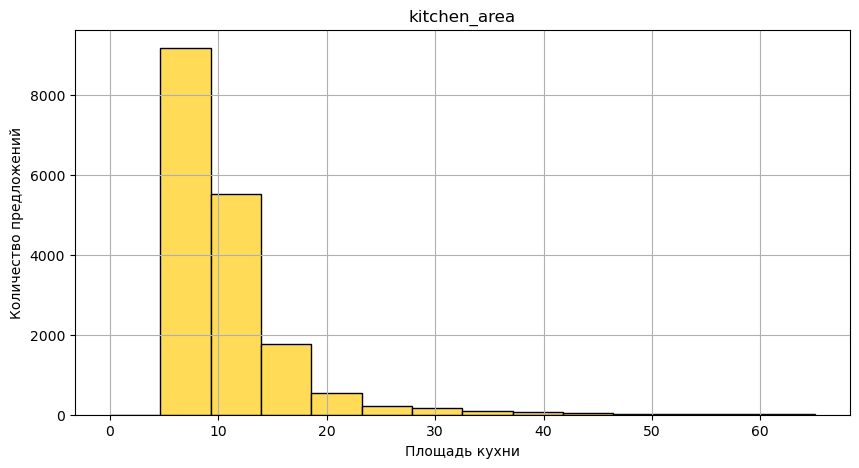

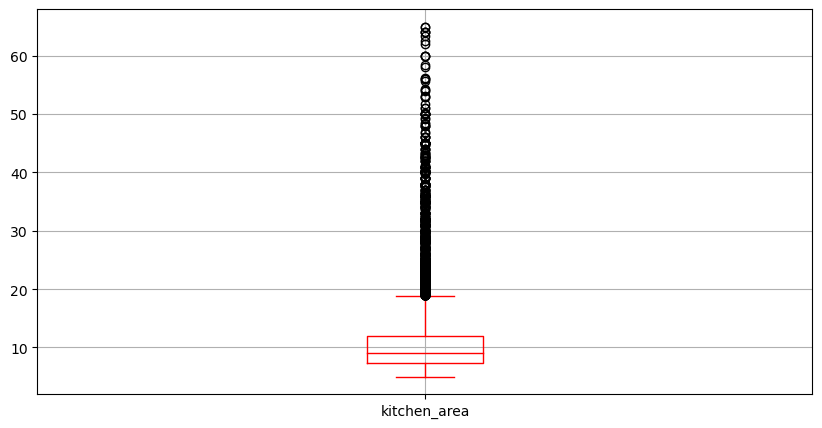

In [151]:
print(data['kitchen_area'].describe())
data.hist(column='kitchen_area',
          bins=int(70 / 5),
          range=(0, 65),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['kitchen_area'], figsize=(10, 5), grid=True, color='red')
plt.show()

Больше всего квартир, в которых площадь кухни варьируется от 5 до 9 квадратных метров.

### last_price (цена объекта)

count    1.762300e+04
mean     7.340340e+06
std      8.812761e+06
min      1.200000e+06
25%      4.000000e+06
50%      5.299000e+06
75%      7.690000e+06
max      3.300000e+08
Name: last_price, dtype: float64


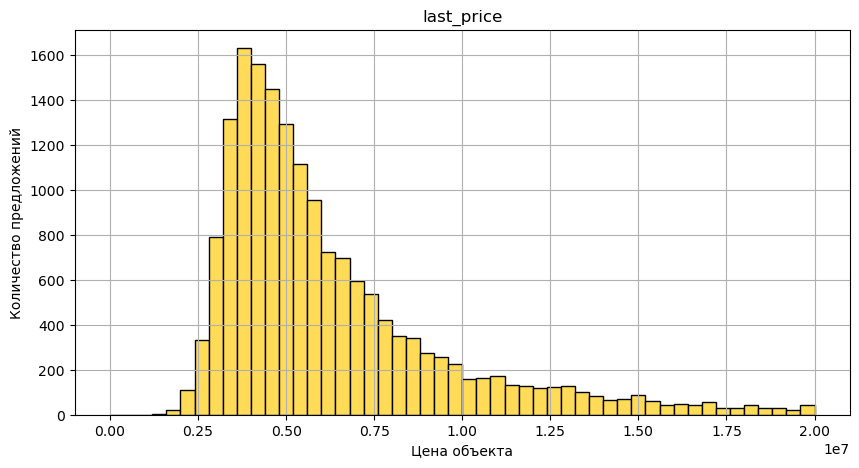

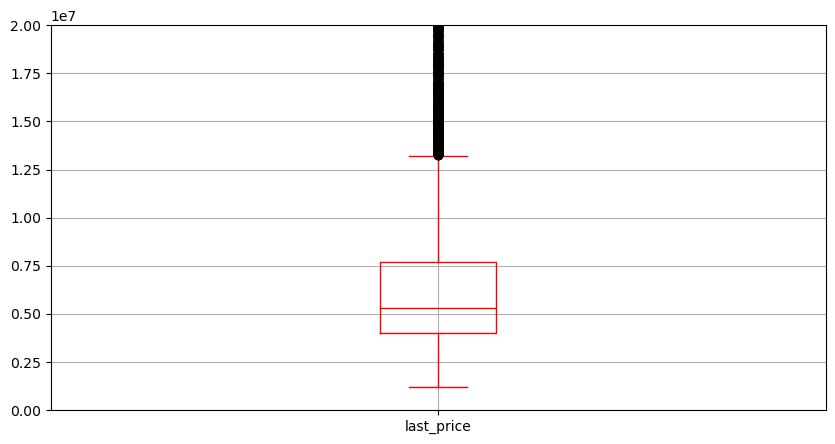

In [152]:
print(data['last_price'].describe())
data.hist(column='last_price',
          bins=50,
          range=(0, 2e+07),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('Цена объекта')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['last_price'], figsize=(10, 5), grid=True, color='red')
plt.ylim(0, 2e+07)
plt.show()

Больше всего квартир стоимостью в диапазоне от 3,5 млн. руб до 5 млн. руб.

### rooms (количество комнат)

count    17623.000000
mean         2.143619
std          1.092725
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64


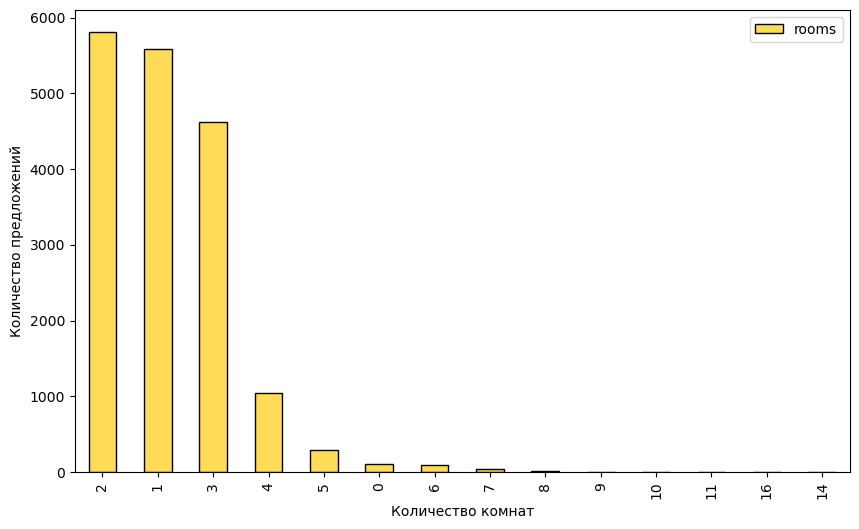

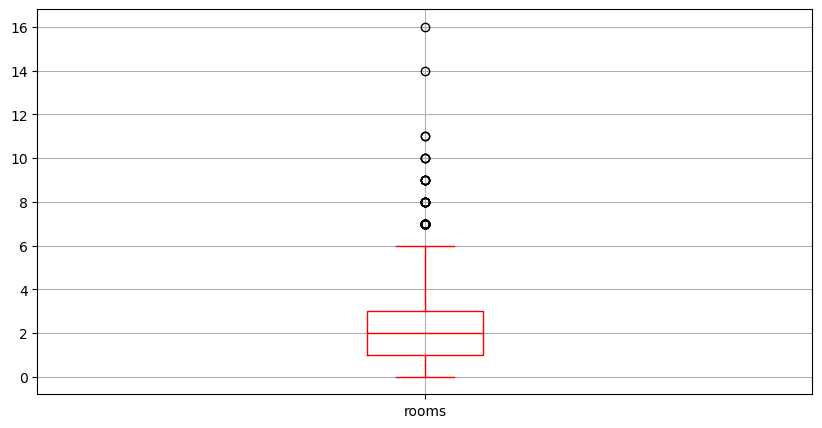

In [153]:
print(data['rooms'].describe())
data['rooms'].value_counts().plot.bar(figsize=(10, 6),
                                      edgecolor='black',
                                      legend=True,
                                      color='#ffdb58')
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['rooms'], figsize=(10, 5), grid=True, color='red')
plt.show()

Больше всего объявлений с двухкомнатными квартирами, однокомнатных чуть меньше.

### ceiling_height (высота потолков)

count    17623.000000
mean         2.709244
std          0.219885
min          2.500000
25%          2.600000
50%          2.650000
75%          2.715000
max          4.000000
Name: ceiling_height, dtype: float64


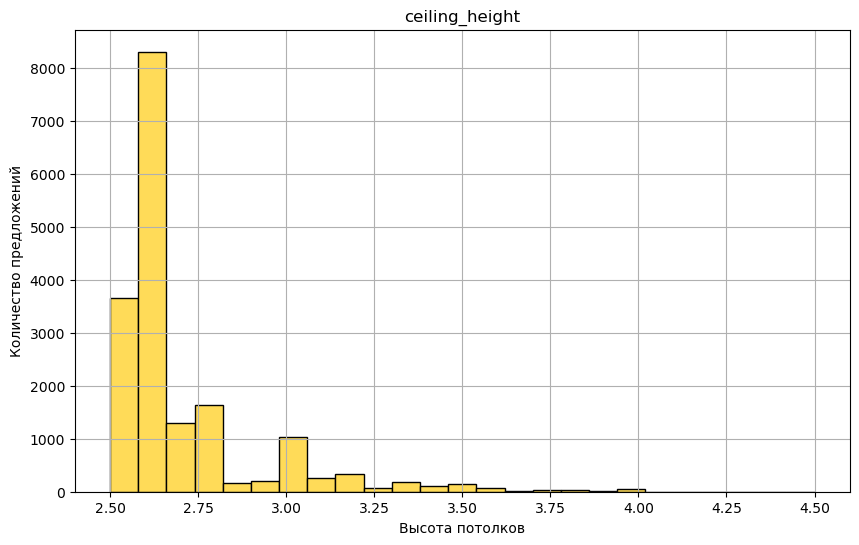

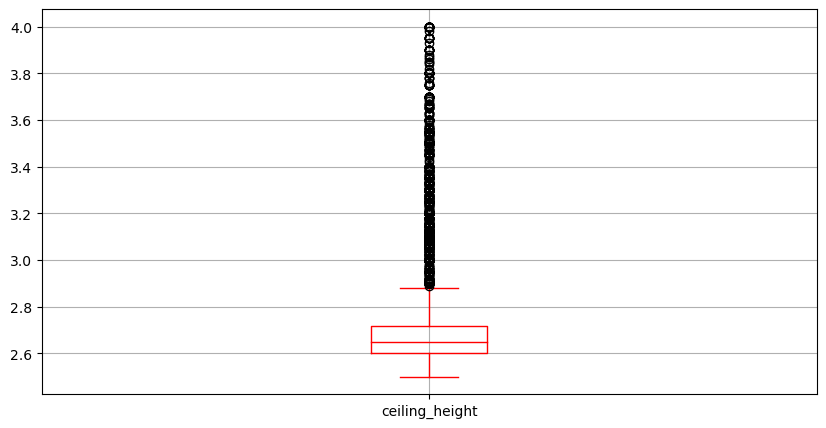

In [154]:
print(data['ceiling_height'].describe())
data.hist(column='ceiling_height',
          bins=int(100 / 4),
          range=(2.5, 4.5),
          figsize=(10, 6),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['ceiling_height'],
             figsize=(10, 5),
             grid=True,
             color='red')
plt.show()

График имеет резкие перепады, скорее всего это связано с тем, что существуют технические стандарты для строительства домов (при этом в разные годы они отличались друг от друга). Стоить отметить, что больше всего в Ленинградской области домов с потолками 2,65 м.

### floor (этаж квартиры)

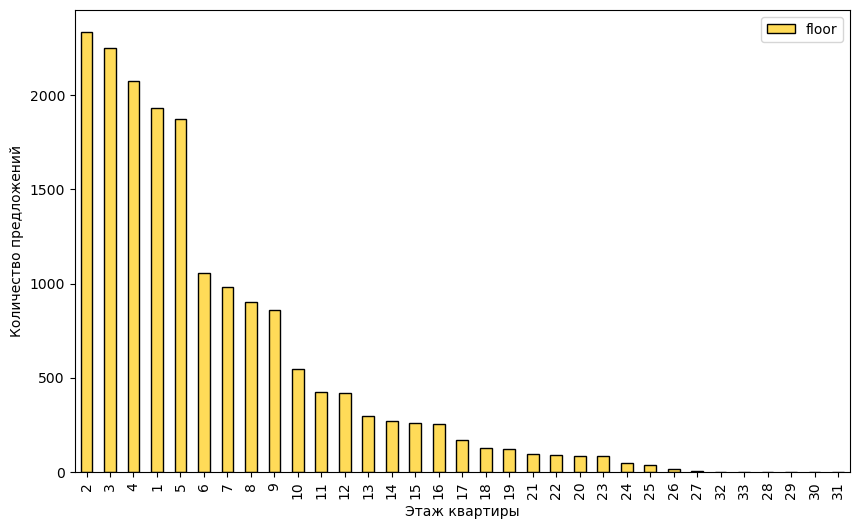

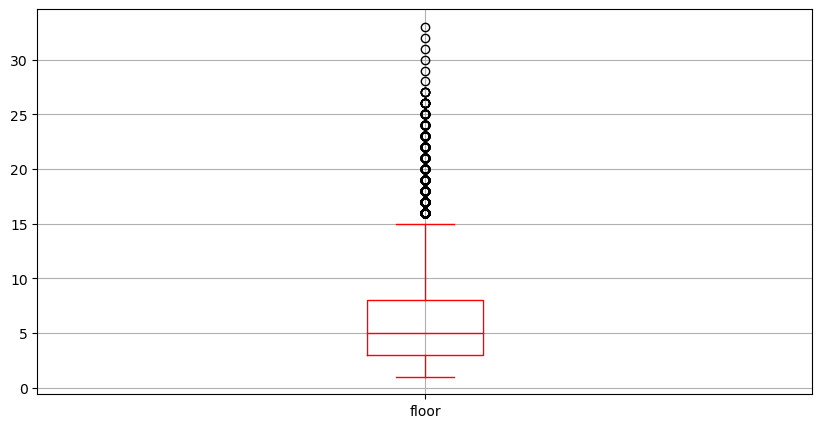

In [155]:
data['floor'].value_counts().plot.bar(figsize=(10, 6), edgecolor = 'black', legend=True, color='#ffdb58')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['floor'], figsize=(10,5), grid=True, color='red')
plt.show()

Большинство квартир в домах расположены на 2-5 этажах.

### floor_category (тип этажа квартиры)

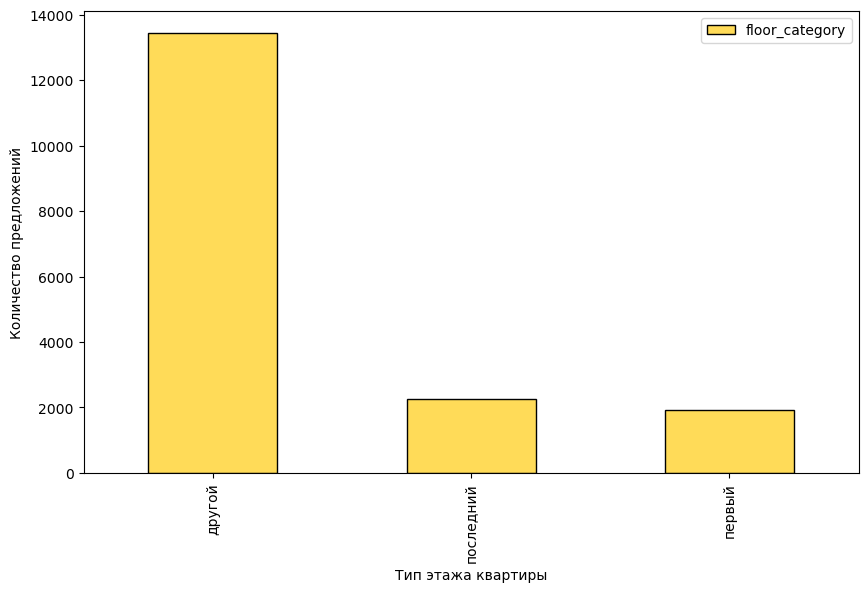

In [156]:
data['floor_category'].value_counts().plot.bar(figsize=(10, 6),
                                               edgecolor='black',
                                               legend=True,
                                               color='#ffdb58')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество предложений')
plt.show()

Не первых и не последних этажей в объявлениях в 7 раз больше.

### floors_total (количество этажей в доме)

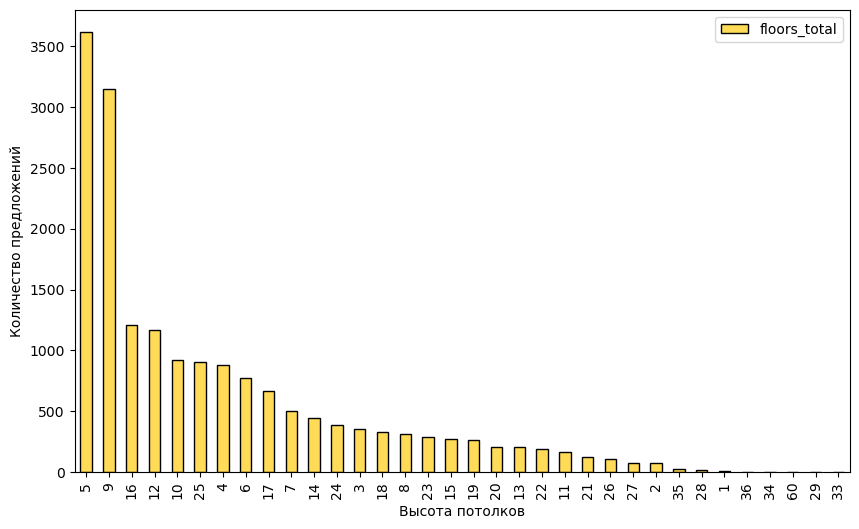

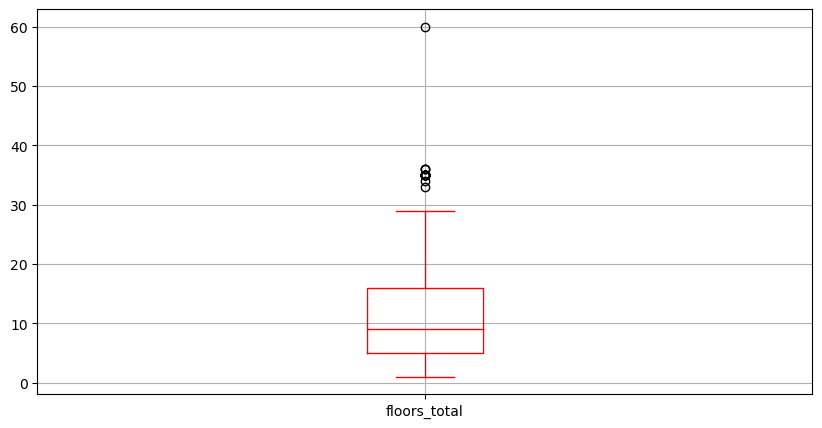

In [157]:
data['floors_total'].value_counts().plot.bar(figsize=(10, 6),
                                             edgecolor='black',
                                             legend=True,
                                             color='#ffdb58')
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['floors_total'], figsize=(10, 5), grid=True, color='red')
plt.show()

Больше всего пятиэтажных домов. Это вполне закономерно. В Ленинградской области старый жилой фонд, а в Санкт-Петербурге по градостроительному плану есть ограничения в этажности в зависимости от района с целью сохранения архитектуры.

### city_centers_nearest (расстояние до центра города в метрах)

count    17622.000000
mean     14199.012995
std       8578.440912
min        181.000000
25%       9289.000000
50%      13104.500000
75%      16274.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


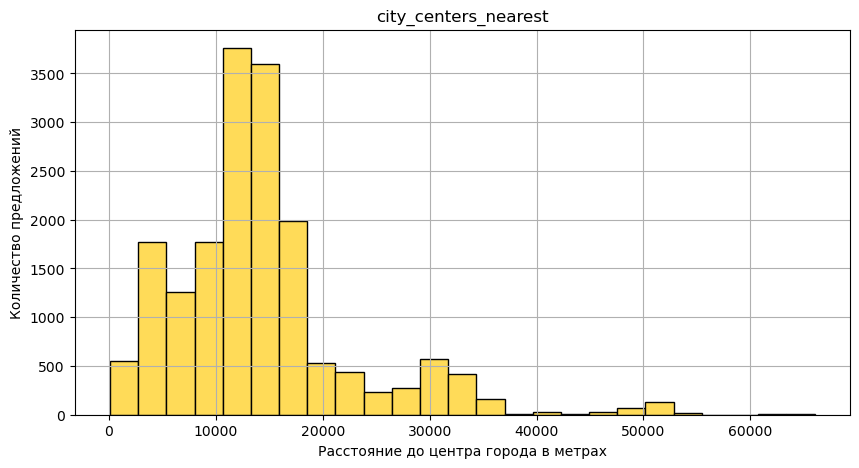

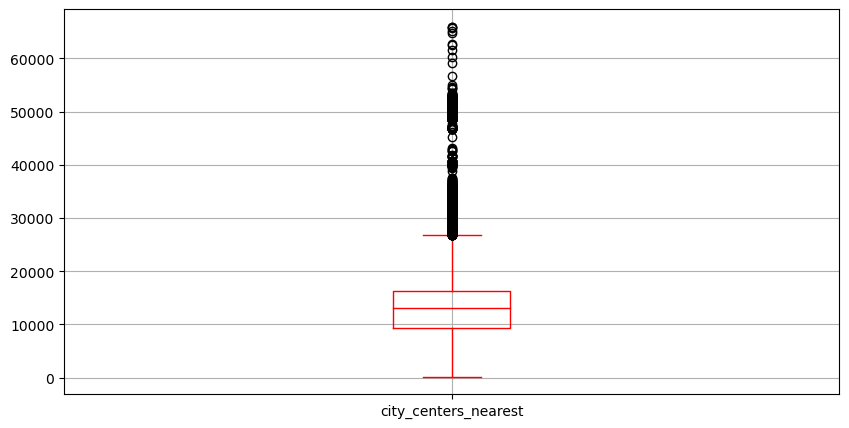

In [158]:
print(data['city_centers_nearest'].describe())
data.hist(column='city_centers_nearest',
          bins=int(100 / 4),
          range=(100, 66000),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['city_centers_nearest'],
             figsize=(10, 5),
             grid=True,
             color='red')
plt.show()

Большинство квартир расположены примерно в 13000 м от центра города.

### airports_nearest (расстояние до ближайшего аэропорта)

count    17623.000000
mean     28788.040629
std      12601.372286
min       6450.000000
25%      18548.000000
50%      26770.000000
75%      37280.500000
max      84869.000000
Name: airports_nearest, dtype: float64


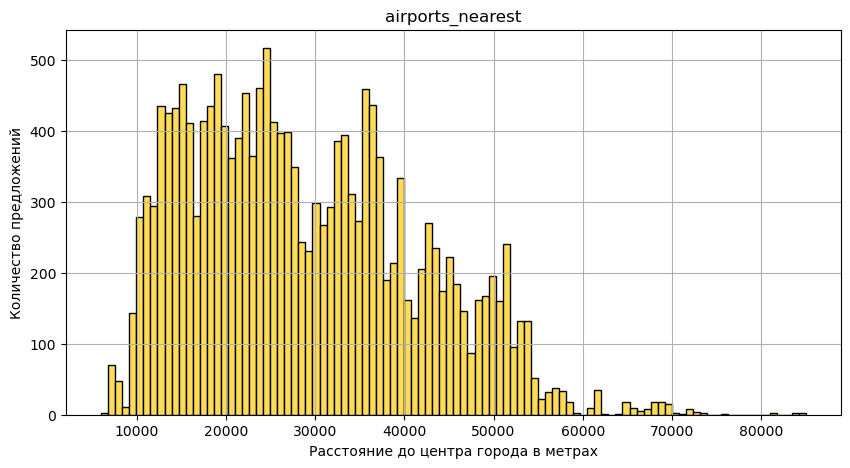

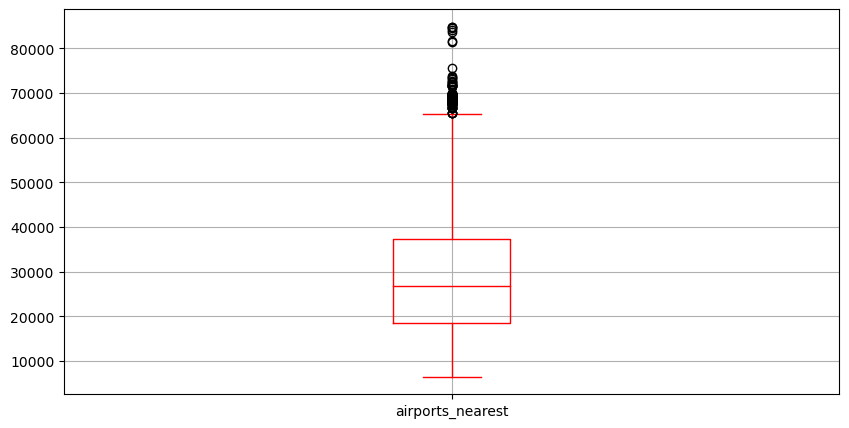

In [159]:
print(data['airports_nearest'].describe())
data.hist(column='airports_nearest',
          bins=100,
          range=(6000, 85000),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество предложений')
plt.show()
data.boxplot(column=['airports_nearest'],
             figsize=(10, 5),
             grid=True,
             color='red')
plt.show()

Мы видим больше всего квартир в 25000 м от аэропорта. Это можно объяснить тем, что на этом расстоянии от аэропорта находится Санкт-Петербург и другие населенные пункты, где больше всего объявлений.

### publication_weekday (день публикации)

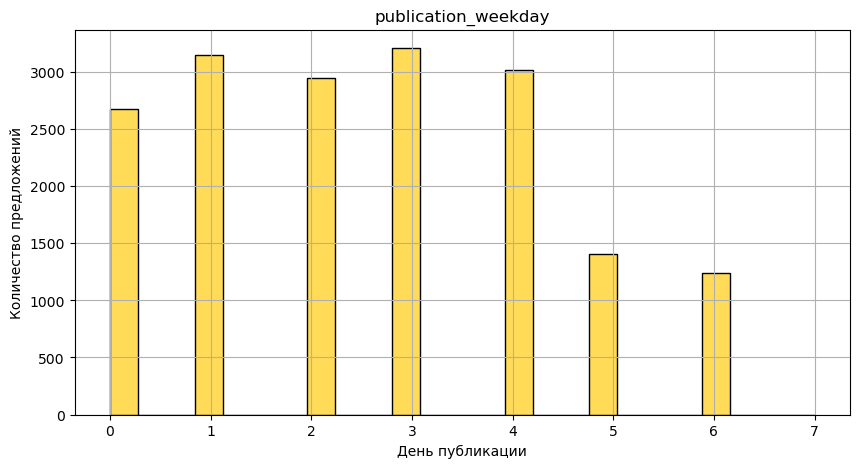

In [160]:
data.hist(column='publication_weekday',
          bins=int(100 / 4),
          range=(0, 7),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black')
plt.xlabel('День публикации')
plt.ylabel('Количество предложений')
plt.show()

Чаще всего объявления выкладывают в четверг, а реже всего в воскресенье.

### publication_month (месяц публикации)

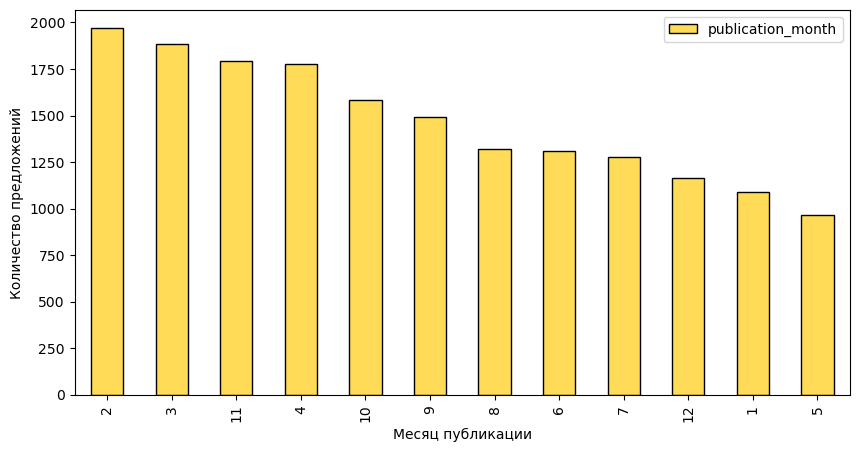

In [161]:
data['publication_month'].value_counts().plot.bar(figsize=(10, 5), color='#ffdb58', edgecolor = 'black', legend=True)
plt.xlabel('Месяц публикации')
plt.ylabel('Количество предложений')
plt.show()

Чаще всего объявления выкладывают в феврале, а реже всего в мае.

### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

count    15358.000000
mean       182.261753
std        223.501854
min          1.000000
25%         43.000000
50%         95.500000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64
60.0      456
45.0      417
90.0      183
30.0      182
7.0       178
         ... 
831.0       1
1081.0      1
876.0       1
996.0       1
971.0       1
Name: days_exposition, Length: 1088, dtype: int64


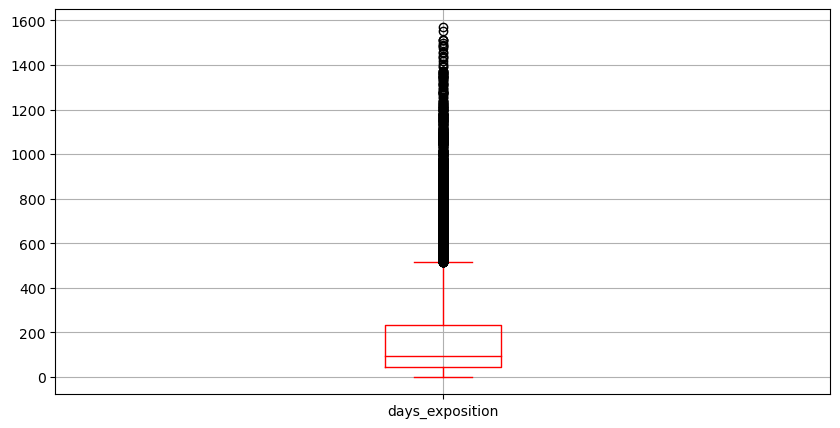

AxesSubplot(0.125,0.11;0.775x0.77)


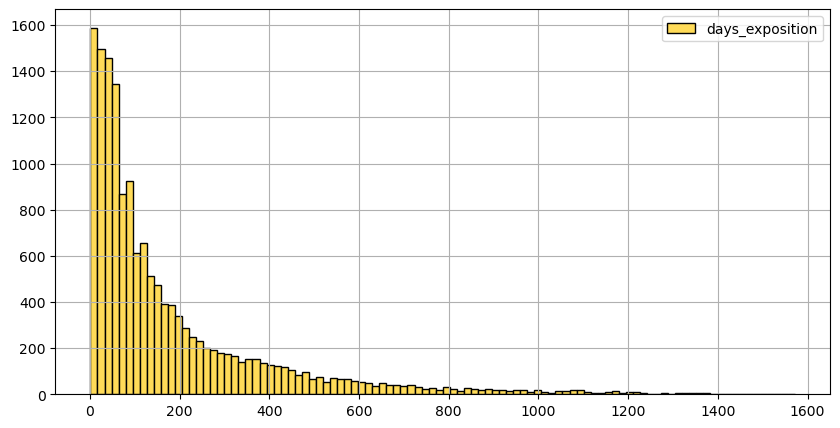

In [162]:
print(data['days_exposition'].describe())
print(data['days_exposition'].value_counts())
data.boxplot(column=['days_exposition'],
             figsize=(10, 5),
             grid=True,
             color='red')
plt.show()
print(data['days_exposition'].hist(bins=100,
                                   figsize=(10, 5),
                                   ec='black',
                                   legend=True,
                                   color='#ffdb58'))

Максимальный показатель по данному параметру - 1572. Это почти 4,5 года. Это слишком долго. При этом стандартное отклонение превышает среднее. Оставим только те квартиры, которые продали меньше, чем за 400 дней(примерно год). 

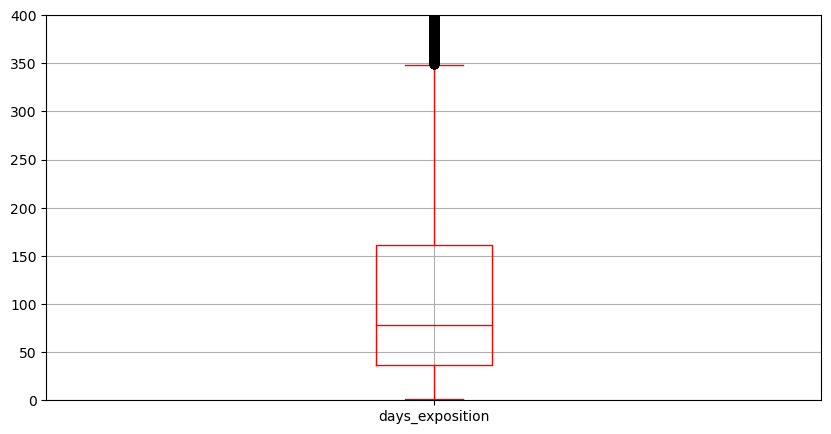

count    13361.000000
mean       110.957563
std         98.063390
min          1.000000
25%         36.000000
50%         78.000000
75%        161.000000
max        400.000000
Name: days_exposition, dtype: float64
60.0     456
45.0     417
90.0     183
30.0     182
7.0      178
        ... 
362.0      4
386.0      3
2.0        3
373.0      2
1.0        1
Name: days_exposition, Length: 400, dtype: int64


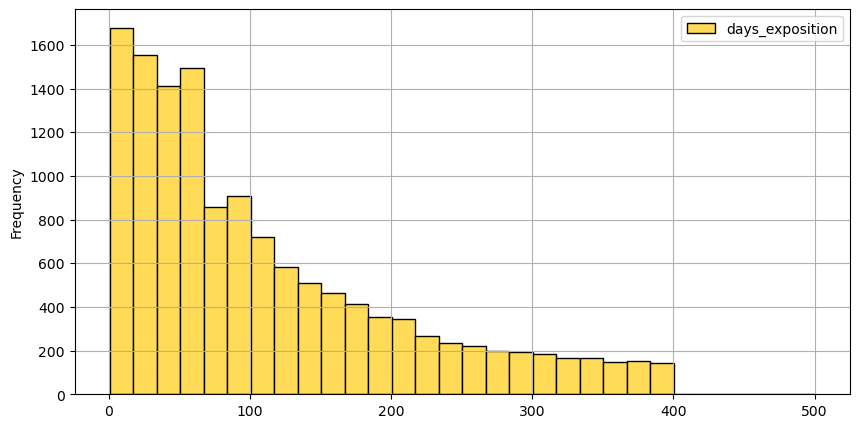

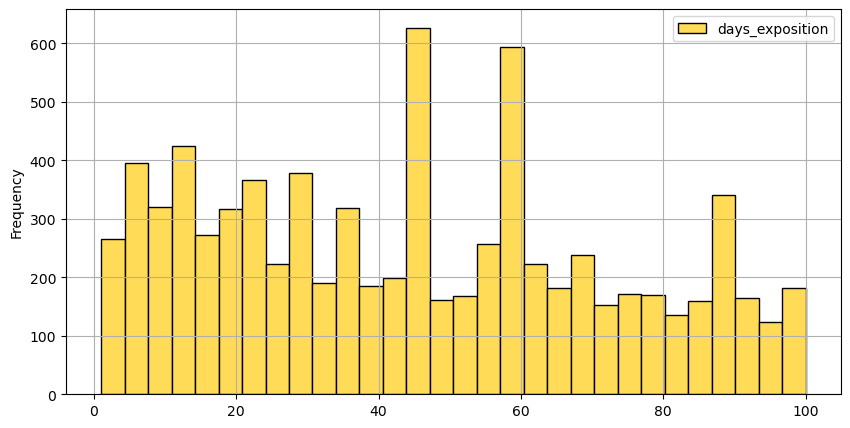

In [163]:
data = data.query('days_exposition <= 400')
data.boxplot(column=['days_exposition'],
             figsize=(10, 5),
             grid=True,
             color='red')
plt.ylim(0, 400)
plt.show()
data.plot(y='days_exposition',
          kind='hist',
          bins=30,
          grid=True,
          range=(1, 500),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black',
          legend=True)
data.plot(y='days_exposition',
          kind='hist',
          bins=30,
          grid=True,
          range=(1, 100),
          figsize=(10, 5),
          color='#ffdb58',
          edgecolor='black',
          legend=True)
print(data['days_exposition'].describe())
print(data['days_exposition'].value_counts())

- среднее - 110
- медиана - 78
- исходя из графика boxplot можно сделать вывод, **слишком быстрой** продажей будут считаться квартиры, проданные примерно до 45 дней, **нормальным** сроком продажи будут считаться квартиры, проданные за 45-160 дней, а **слишком долгой** продажей будут считать квартиры, проданные больше, чем за 165 дней.

### Какие факторы больше всего влияют влияют на общую (полную) стоимость объекта?

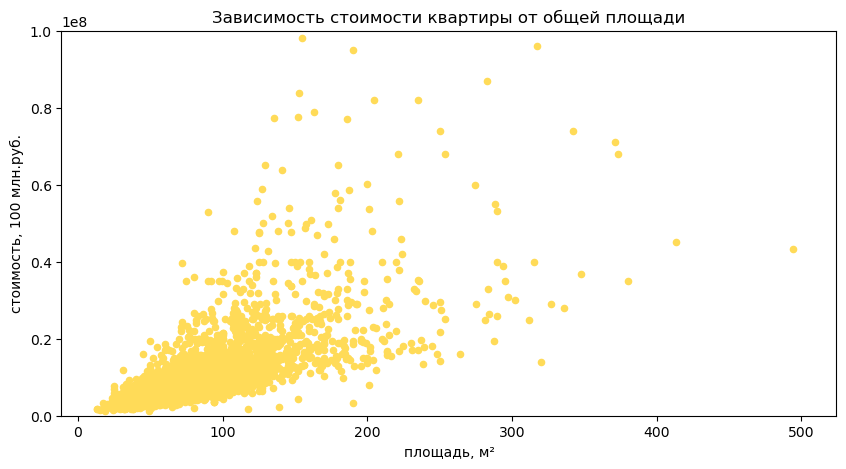

In [164]:
data.plot(x='total_area',
          y='last_price',
          kind='scatter',
          figsize=(10, 5),
          color='#ffdb58',
          legend=True)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Зависимость стоимости квартиры от общей площади прямо пропорциональная. Чем больше площадь, тем больше цена.

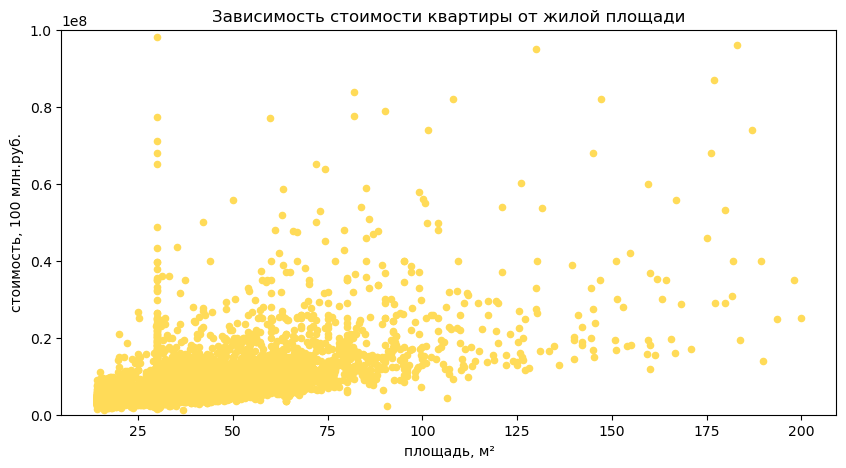

In [165]:
data.plot(x='living_area',
          y='last_price',
          kind='scatter',
          figsize=(10, 5),
          color='#ffdb58',
          legend=True)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Зависимость стоимости квартиры от жилой площади прямо пропорциональная. Чем больше жилая площадь, тем больше цена.

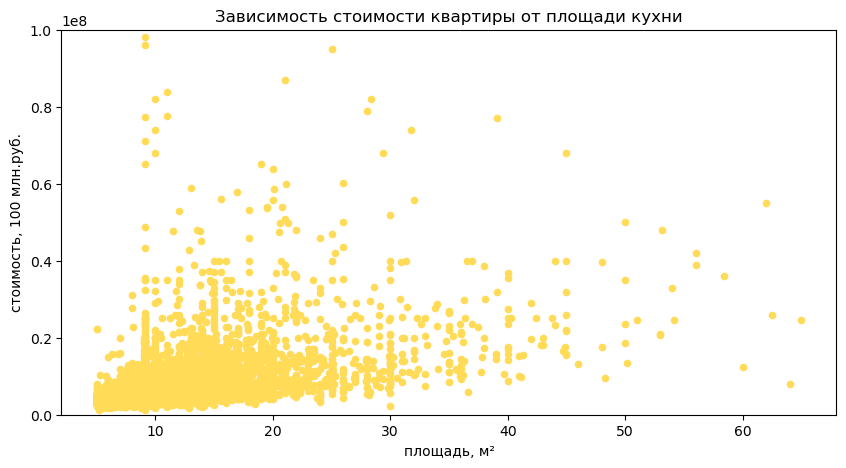

In [166]:
data.plot(x='kitchen_area',
          y='last_price',
          kind='scatter',
          figsize=(10, 5),
          color='#ffdb58',
          legend=True)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

А вот зависимость стоимости квартиры от площади кухни минимальная, но все равно присуствует.

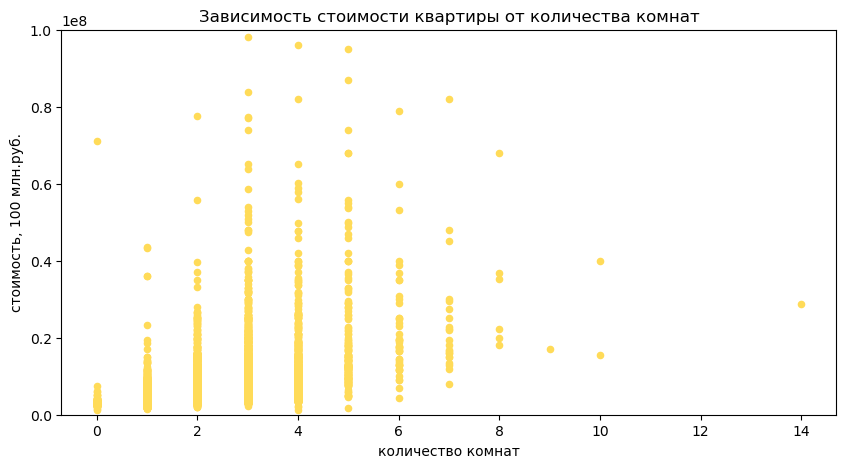

In [167]:
data.plot(x='rooms',
          y='last_price',
          kind='scatter',
          figsize=(10, 5),
          color='#ffdb58',
          legend=True)
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Чем больше комнат, тем больше цена, но стоит отметить, что начиная с четырехкомнатных квартир, цена наоборот падает.

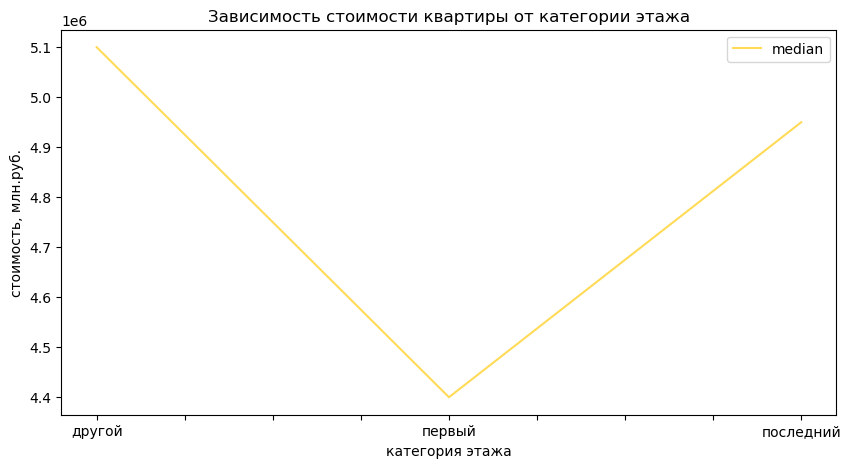

,count,median
floor_category,,
другой,10298,5100000.0
последний,1645,4950000.0
первый,1418,4400000.0


In [168]:
pivot_table_floor_category = data.pivot_table(index='floor_category',
                                              values='last_price',
                                              aggfunc=['count', 'median'])
pivot_table_floor_category.columns = ['count', 'median']
pivot_table_floor_category.plot(y='median',
                                figsize=(10, 5),
                                color='#ffdb58',
                                legend=True)
plt.title('Зависимость стоимости квартиры от категории этажа')
plt.xlabel('категория этажа')
plt.ylabel('стоимость, млн.руб.')
plt.show()

pivot_table_floor_category.sort_values('median', ascending=False)

Стоимость квартир зависит и от этажа. Квартиры не на первом и не на последнем этаже стоят чуть дороже.

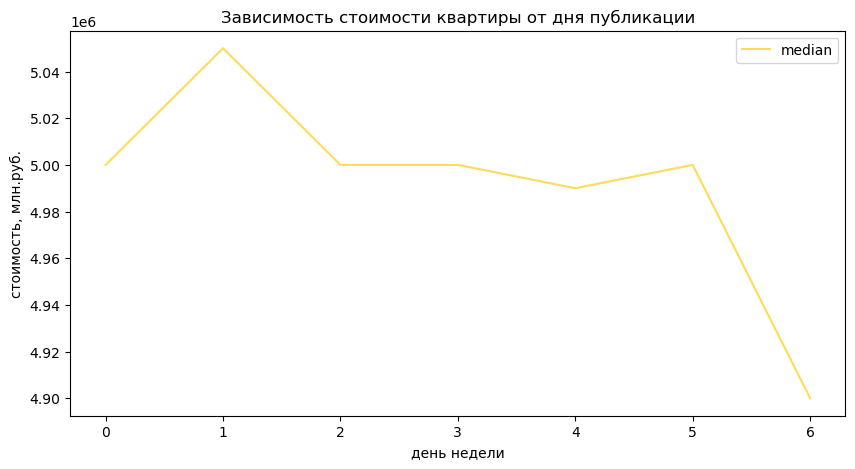

                     count     median
publication_weekday                  
1                     2371  5050000.0
0                     1967  5000000.0
2                     2172  5000000.0
3                     2447  5000000.0
5                     1086  5000000.0
4                     2364  4990000.0
6                      954  4900000.0


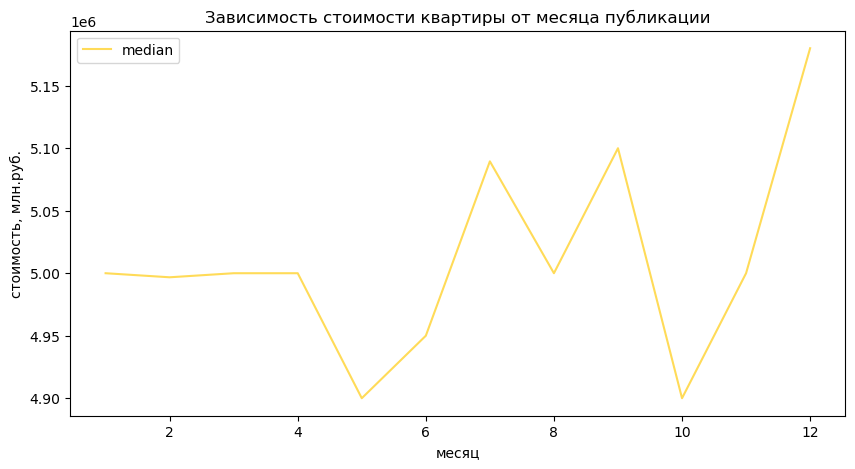

                   count     median
publication_month                  
12                   851  5180000.0
9                   1246  5100000.0
7                   1030  5089500.0
1                    815  5000000.0
3                   1248  5000000.0
4                    971  5000000.0
8                   1102  5000000.0
11                  1463  5000000.0
2                   1539  4996750.0
6                   1064  4950000.0
5                    741  4900000.0
10                  1291  4900000.0


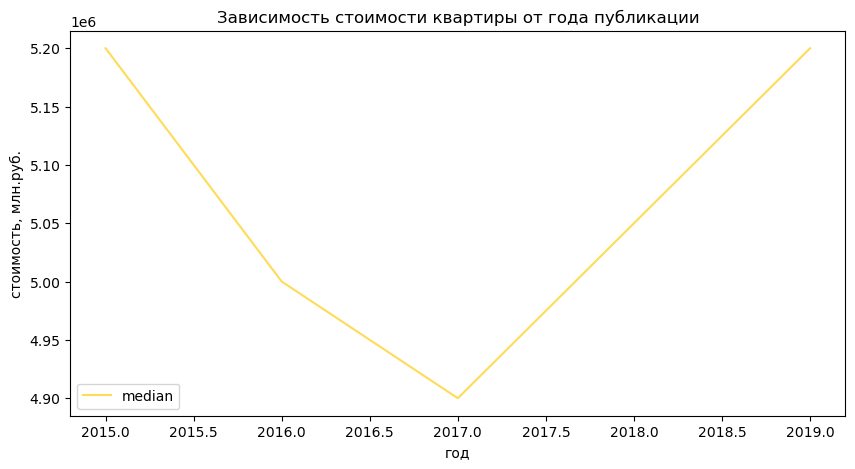

,count,median
publication_year,,
2015,219,5200000.0
2019,857,5200000.0
2018,5399,5050000.0
2016,1393,5000000.0
2017,5493,4900000.0


In [169]:
pivot_table_publication_weekday = data.pivot_table(index='publication_weekday',
                                                   values='last_price',
                                                   aggfunc=['count', 'median'])
pivot_table_publication_weekday.columns = ['count', 'median']
pivot_table_publication_weekday.plot(y='median',
                                     figsize=(10, 5),
                                     color='#ffdb58',
                                     legend=True)
plt.title('Зависимость стоимости квартиры от дня публикации')
plt.xlabel('день недели')
plt.ylabel('стоимость, млн.руб.')
plt.show()

print(pivot_table_publication_weekday.sort_values('median', ascending=False))

pivot_table_publication_month = data.pivot_table(index='publication_month',
                                                 values='last_price',
                                                 aggfunc=['count', 'median'])
pivot_table_publication_month.columns = ['count', 'median']
pivot_table_publication_month.plot(y='median',
                                   figsize=(10, 5),
                                   color='#ffdb58',
                                   legend=True)
plt.title('Зависимость стоимости квартиры от месяца публикации')
plt.xlabel('месяц')
plt.ylabel('стоимость, млн.руб.')
plt.show()

print(pivot_table_publication_month.sort_values('median', ascending=False))

pivot_table_publication_year = data.pivot_table(index='publication_year',
                                                values='last_price',
                                                aggfunc=['count', 'median'])
pivot_table_publication_year.columns = ['count', 'median']
pivot_table_publication_year.plot(y='median',
                                  figsize=(10, 5),
                                  color='#ffdb58',
                                  legend=True)
plt.title('Зависимость стоимости квартиры от года публикации')
plt.xlabel('год')
plt.ylabel('стоимость, млн.руб.')

plt.show()

pivot_table_publication_year.sort_values('median', ascending=False)

- стоимость больше у квартир, выставоенных на продажу в понедельник, а меньше всего в воскресенье;
- стоимость больше у квартир, выставоенных на продажу в декабре, меньше всего в октябре;
- стоимость больше у квартир, выставоенных на продажу в 2015 и в 2019 годах, а меньше всего в 2017.

## топ-10
- Посчитаем среднюю цену одного квадратного метра в населенных пунктах с наибольшим числом объявлений.

In [170]:
top = data['locality_name'].sort_values(
    ascending=False).value_counts().head(10)
top_pivot = data.query('locality_name in @top.index').pivot_table(
    index='locality_name', values='one_price')
top_pivot.round().sort_values(by='one_price', ascending=False)

,one_price
locality_name,
санкт-петербург,110496.0
сестрорецк,101974.0
пушкин,101477.0
поселок парголово,88412.0
петергоф,83121.0
кронштадт,79081.0
поселок шушары,77102.0
колпино,74789.0
красное село,71749.0


Самая высокая стоимость квадратного метра в Санкт-Петербурге - 110496 тыс. руб, а самая низкая в Ломоносове - 71101 тыс. руб

### Средняя цена каждого километра в Санкт-Петербурге

count    1.336100e+04
mean     6.667183e+06
std      7.696514e+06
min      1.200000e+06
25%      3.900000e+06
50%      5.000000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64


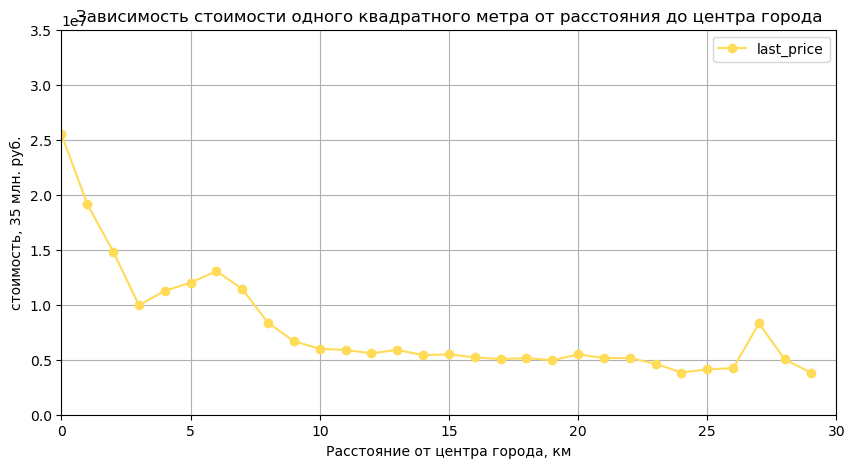

In [171]:
print(data['last_price'].describe())
data['city_centers_km'] = data['city_centers_km'].fillna(value=0).astype(int)
data.query('locality_name == "санкт-петербург"').pivot_table(
    index='city_centers_km', values='last_price').plot(grid=True,
                                                       style='o-',
                                                       xlim=(0, 30),
                                                       figsize=(10, 5),
                                                       color='#ffdb58',
                                                       legend=True)
plt.title(
    'Зависимость стоимости одного квадратного метра от расстояния до центра города'
)
plt.xlabel('Расстояние от центра города, км')
plt.ylabel('стоимость, 35 млн. руб.')
plt.ylim(0, 35000000)
plt.show()

Можно сделать вывод, что самые дорогие квартиры расположены в 3-4 км от центра. С удаленностью в 7 км от центра стоимость идет на убыль. 

### Общий вывод

В ходе исследования мы сделали предобработку данных для очистки датафрейма от неявных дубликатов и выбросов.
Также мы смогли составить **образ среднестатистического объекта недвижимости в Ленобласти**. Это квартира со следующими показателями:
- общая площадь - 30-60 м²;
- жилая площадь - 30 м²;
- площадь кухни - 5-9 м²;
- стоимость - 3,5-5 млн. руб;
- 1-2 комнаты;
- высота потолков - 2,65 м;
- расположена на 2-5 этажах;
- не на первом и не на последнем этаже;
- в пятиэтажном или девятиэтажном доме;
- расположена от центра в 13 км;
- расположена от аэропорта в 25 км; 

**Определили факторы, которые влияют на стоимость квартиры, а именно:**
- чем больше площадь квартиры, тем выше её стоимость;
- чем больше комнат, тем выше стоимость;
- чем ближе квартира располагается к центру, тем выше ее стоимость;
- квартиры расположенные не на первом и не на последнем этажах стоят дороже;
- самы дорогие квартиры публиковались в понедельник, в декабре в 2015 и 2019 годах;
- самые дорогие квартиры расположены не дальше 4 км от центра города.

Также определили:
- **Среднее время продажи квартиры** - от 45 до 160 день.
- **Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге** - 110496 руб./м² (топ-10 населенных пунктов по количеству объявлений).
- **Самая низкая средняя стоимость квадратного метра в Ломоносове** - 71101 руб./м² (топ-10 населенных пунктов по количеству объявлений).